In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics,preprocessing
from sklearn.metrics import classification_report
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [2]:
### sultan-gpu-pc
path="/home/sultan/EEG_CP/WAVELET_SPECTROGRAM/Features_data/Induced_100sam_all.csv"
#sultan localpc
# path="C:/Users/sultan/Documents/CP_ALL_DATA/Final_Features_induced_evoked/Induced_100sam_all.csv"
dataset1 =pd.read_csv(path)

In [3]:
# np.min(dataset1)

In [4]:
# an=np.arange(0,100,2)
# bn=np.arange(100,202,2)
# rndr=np.concatenate([an,bn])
# # dataset2=dataset1.drop([60,61,62,63,232,233],axis=0)
# dataset2=dataset1.drop([61,63,232,233],axis=0)
# # dataset=dataset1.drop(range(0,10),axis=0)
# dataset=dataset2.drop(rndr,axis=0)

In [5]:
# an=np.arange(0,100,2)
# bn=np.arange(100,198,2)
# rndr=np.concatenate([an,bn])
# len(rndr)

In [6]:
dataset=abs(dataset1)
Xc=dataset.iloc[:,3:].values
y=dataset.iloc[:,2].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(Xc)

### LocalPc format

In [7]:
### LocalPc format
# dataset=dataset1
# Xc=dataset.iloc[:,3:].values
# y=dataset.iloc[:,2].values
# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(Xc)

In [8]:
# y.shape
y

array([1., 1., 1., ..., 0., 0., 0.])

In [9]:
rs=16

In [10]:
np.unique(y,return_counts=True)

(array([0., 1.]), array([1440, 1440]))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=rs) 

In [12]:
X_test.shape, y_test.shape

((576, 272), (576,))

In [13]:
np.unique(y_test)
np.unique(y_test,return_counts=True)

(array([0., 1.]), array([285, 291]))

# Grid search

### Whole brain accuracy and AUC

In [14]:
# whc=pd.DataFrame([acc,roc_auc])
# whc

In [15]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1],'gamma':[0.01 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [16]:
k=0;j=68; acgw=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[10],'gamma':[0.01]}
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgw=np.append(acgw,acc)
    scores=clf.cv_results_['mean_test_score']
#     print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
    print("Accuracy:%0.4f (+/-%0.4f)" %(scores.mean(), scores.std()))
    print (acc)
    print (k,j)
    print(classification_report(y_test, pred))
#     Sve=float(len(clf.best_estimator_.support_vectors_)/X_train.shape[0])
#     print('Support:',Sve)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('AUC:',roc_auc)
    k=k+68;j=j+68;

Accuracy:0.8826 (+/-0.0123)
0.9097222222222222
(0, 68)
             precision    recall  f1-score   support

        0.0       0.89      0.93      0.91       285
        1.0       0.93      0.89      0.91       291

avg / total       0.91      0.91      0.91       576

('AUC:', 0.9098932899258455)
Accuracy:0.8739 (+/-0.0146)
0.890625
(68, 136)
             precision    recall  f1-score   support

        0.0       0.89      0.89      0.89       285
        1.0       0.89      0.89      0.89       291

avg / total       0.89      0.89      0.89       576

('AUC:', 0.8905950443118104)
Accuracy:0.9194 (+/-0.0118)
0.9322916666666666
(136, 204)
             precision    recall  f1-score   support

        0.0       0.95      0.91      0.93       285
        1.0       0.91      0.96      0.93       291

avg / total       0.93      0.93      0.93       576

('AUC:', 0.9320491951528306)
Accuracy:0.9324 (+/-0.0155)
0.9496527777777778
(204, 272)
             precision    recall  f1-score   suppo

In [17]:
###This is the for last data only
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc_rh = auc(false_positive_rate, true_positive_rate)
roc_auc_rh

0.9496654006149393

In [18]:
clf.best_estimator_

SVC(C=60, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.00140056022409,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
yr=X_test[:,0:68]
yr.shape

(576, 68)

# Hemisphere

### RH

In [21]:
# only 34 features 
a=range(0,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=rs) 
# parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
svc = svm.SVC()
k=0;j=34; acgr=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgr=np.append(acgr,acc)
    scores=clf.cv_results_['mean_test_score']
    print("Accuracy:%0.4f (+/-%0.4f)" %(scores.mean(), scores.std()))
    print (acc)
    print (k,j)
#     print(classification_report(y_test, pred))
#     Sve=float(len(clf.best_estimator_.support_vectors_)/X_train.shape[0])
#     print('Support:',Sve)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('AUC:',roc_auc)
    k=k+34;j=j+34;

Accuracy:0.8135 (+/-0.0134)
0.8472222222222222
(0, 34)
('AUC:', 0.847241815879906)
Accuracy:0.7978 (+/-0.0156)
0.8107638888888888
(34, 68)
('AUC:', 0.8106167480557063)
Accuracy:0.8207 (+/-0.0116)
0.8315972222222222
(68, 102)
('AUC:', 0.8315970338216676)
Accuracy:0.8015 (+/-0.0132)
0.8072916666666666
(102, 136)
('AUC:', 0.8072888406583469)


In [ ]:
###This is the for last data only
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
# roc_auc_rh = auc(false_positive_rate, true_positive_rate)
# roc_auc_rh

### LH

In [22]:
b=range(1,(X.shape[1]),2)
d22=X[:,b];
X_train, X_test, y_train, y_test = train_test_split(d22,y, test_size=.20, random_state=rs) 
k=0;j=34; acgl=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
#     parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgl=np.append(acgl,acc)
    scores=clf.cv_results_['mean_test_score']
#     print scores
    print("Accuracy:%0.4f (+/-%0.4f)" %(scores.mean(), scores.std()))
    print (acc)
    print (k,j)
    print(classification_report(y_test, pred))
#     Sve=float(len(clf.best_estimator_.support_vectors_)/X_train.shape[0])
#     print('Support:',Sve)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('AUC:',roc_auc)
    k=k+34;j=j+34;

Accuracy:0.7890 (+/-0.0149)
0.8125
(0, 34)
             precision    recall  f1-score   support

        0.0       0.78      0.86      0.82       285
        1.0       0.85      0.77      0.81       291

avg / total       0.82      0.81      0.81       576

('AUC:', 0.8129499005245071)
Accuracy:0.7468 (+/-0.0162)
0.7690972222222222
(34, 68)
             precision    recall  f1-score   support

        0.0       0.75      0.80      0.77       285
        1.0       0.79      0.74      0.76       291

avg / total       0.77      0.77      0.77       576

('AUC:', 0.7694158075601375)
Accuracy:0.8227 (+/-0.0134)
0.8420138888888888
(68, 102)
             precision    recall  f1-score   support

        0.0       0.84      0.84      0.84       285
        1.0       0.84      0.84      0.84       291

avg / total       0.84      0.84      0.84       576

('AUC:', 0.8420148308916622)
Accuracy:0.8508 (+/-0.0119)
0.8732638888888888
(102, 136)
             precision    recall  f1-score   support



In [23]:
###This is the for last data only
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc_rh = auc(false_positive_rate, true_positive_rate)
roc_auc_rh

0.8733767408211249

In [24]:
t=np.linspace(0,3,4, endpoint=True)
time=pd.DataFrame(t)
# a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])
a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])

In [25]:
np.max(acgl)
np.max(a.iloc[:,3])

0.8472222222222222

In [26]:
# wpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
# dall=a
# # dall.to_csv(wpath+'svm_res_100sam_10ms_clear_v1.csv')
# dall.to_csv(wpath+'svm_res_band_100sam_clear_v1.csv')

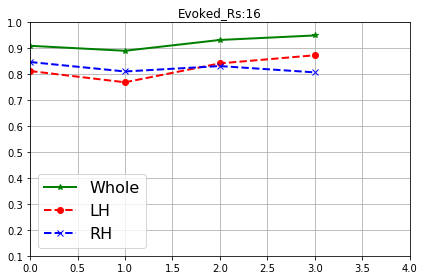

In [27]:
axis_font = {'fontname':'Arial', 'size':'15'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
tw1=a.iloc[0:,0];Acdw=a.iloc[0:,1];Acdlh=a.iloc[0:,2];Acdrh=a.iloc[0:,3]
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdlh,'--r',linewidth=2,marker='o')
plt.plot(tw1, Acdrh,'--b',linewidth=2,marker='x')
plt.title('Evoked_Rs:'+str(rs))
plt.xlim(0,4)
plt.ylim(0.1,1)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Whole','LH','RH'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()

In [28]:
len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

40.104166666666664

In [29]:
# dall

In [30]:
a

,time,Whole,LH,RH
,0,0,0,0
0,0.0,0.909722,0.812500,0.847222
1,1.0,0.890625,0.769097,0.810764
2,2.0,0.932292,0.842014,0.831597
3,3.0,0.949653,0.873264,0.807292


### Stop here

#### Writing into a csv file

In [ ]:
# wrpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
# bandallclean=pd.concat([Ffe*100,bb*100],axis=0)
# # bandallclean.iloc[0:,:]
# bandallclean
# bandallclean.to_csv(wrpath+str(rs)+'Clear_band.csv')
# wrpath+str(rs)+'Clear_band.cbsv'

In [ ]:
rs

In [36]:
# clf.cv_results_
scores.mean()

0.85078125

In [ ]:
# abs(dataset1)

In [ ]:
# dataset1